# Chap 5.4 PixelCNN_MD

----

Conda env : [cv_playgrounds](../../../README.md#setup-a-conda-environment)

----



In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
from pathlib import Path
import os


In [3]:
def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

## 0. Parameters

In [4]:
IMAGE_SIZE = 32
N_COMPONENTS = 5
EPOCHS = 10
BATCH_SIZE = 128

## 1. Prepare Data

2025-05-07 22:42:01.661865: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-05-07 22:42:01.661893: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-05-07 22:42:01.661900: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-05-07 22:42:01.661931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-07 22:42:01.661951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


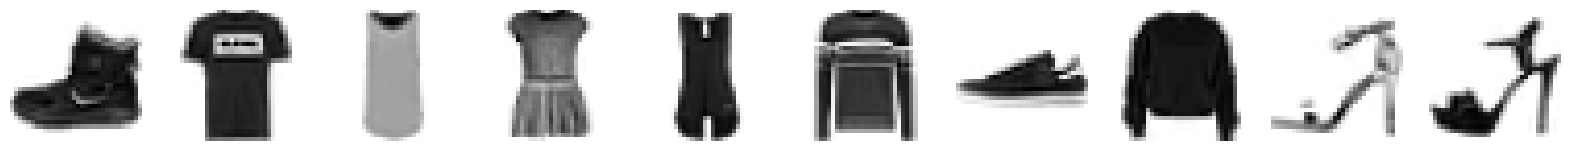

In [5]:
# Load the data
(x_train, _), (_, _) = datasets.fashion_mnist.load_data()

# Preprocess the data
def preprocess(imgs):
    imgs = np.expand_dims(imgs, -1)
    imgs = tf.image.resize(imgs, (IMAGE_SIZE, IMAGE_SIZE)).numpy()
    return imgs


input_data = preprocess(x_train)

# Show some items of clothing from the training set
display(input_data)

## 2. PixelCNN

In [6]:
# Define a Pixel CNN network
dist = tfp.distributions.PixelCNN(
    image_shape=(IMAGE_SIZE, IMAGE_SIZE, 1),
    num_resnet=1,
    num_hierarchies=2,
    num_filters=32,
    num_logistic_mix=N_COMPONENTS,
    dropout_p=0.3,
)

# Define the model input
image_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# Define the log likelihood for the loss fn
log_prob = dist.log_prob(image_input)

# Define the model
pixelcnn = models.Model(inputs=image_input, outputs=log_prob)
pixelcnn.add_loss(-tf.reduce_mean(log_prob))

## 3. Train PixelCNN

Layer _PixelCNNNetwork was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Layer _PixelCNNNetwork was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/10


2025-05-07 22:42:07.228454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-07 22:42:08.016525: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


469/469 [==============================] - ETA: 0s - loss: 2340.4739
Saved to ./temp/output/generated_img_000.png


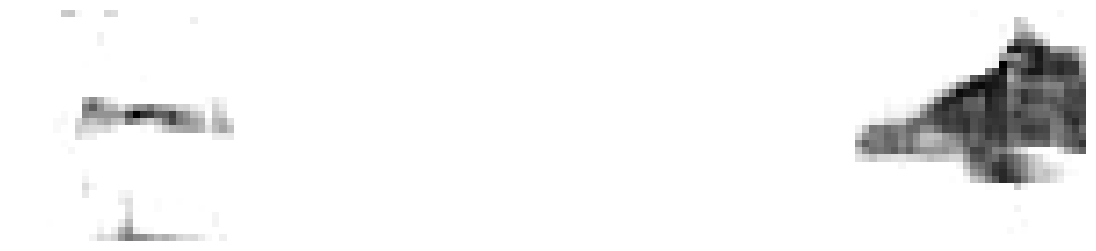

469/469 [==============================] - 348s 714ms/step - loss: 2340.4739
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 2078.2710
Saved to ./temp/output/generated_img_001.png


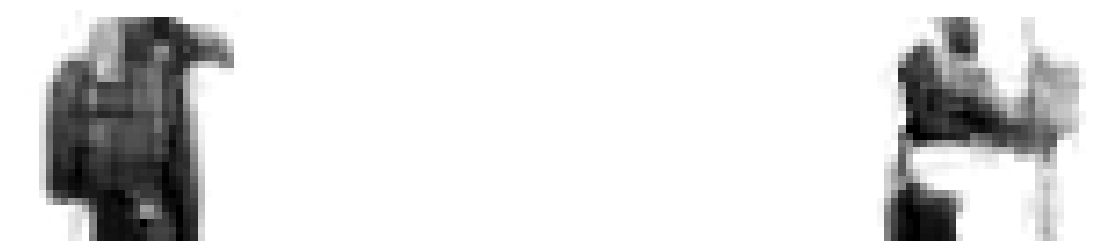

469/469 [==============================] - 315s 672ms/step - loss: 2078.2710
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 1987.9518
Saved to ./temp/output/generated_img_002.png


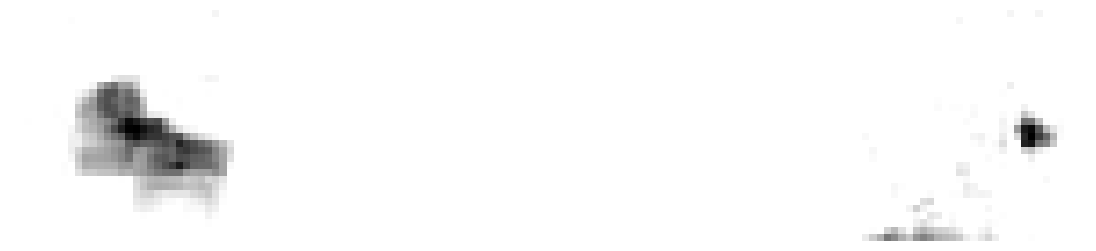

469/469 [==============================] - 310s 662ms/step - loss: 1987.9518
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 1929.1506
Saved to ./temp/output/generated_img_003.png


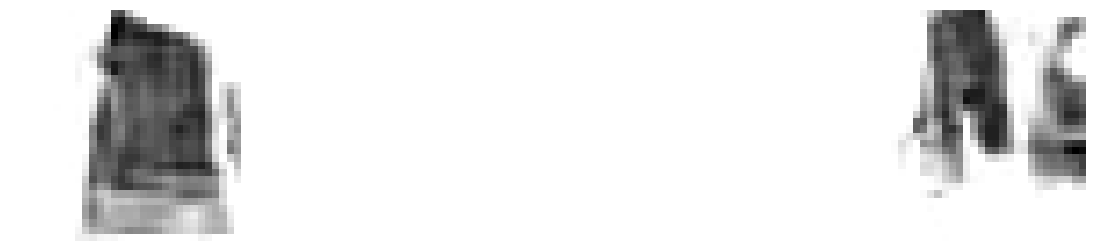

469/469 [==============================] - 317s 676ms/step - loss: 1929.1506
Epoch 5/10
469/469 [==============================] - ETA: 0s - loss: 1898.3011
Saved to ./temp/output/generated_img_004.png


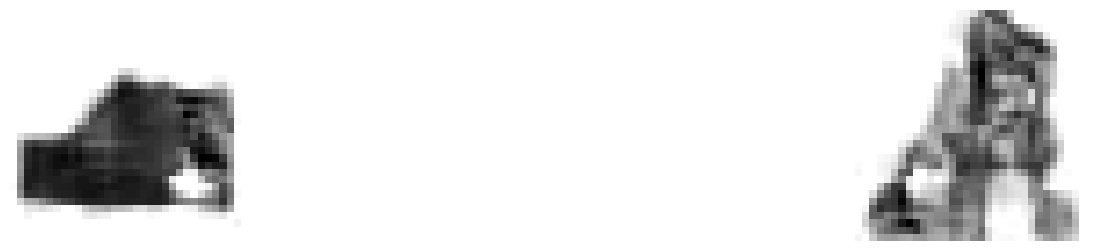

469/469 [==============================] - 318s 678ms/step - loss: 1898.3011
Epoch 6/10
469/469 [==============================] - ETA: 0s - loss: 1858.2999
Saved to ./temp/output/generated_img_005.png


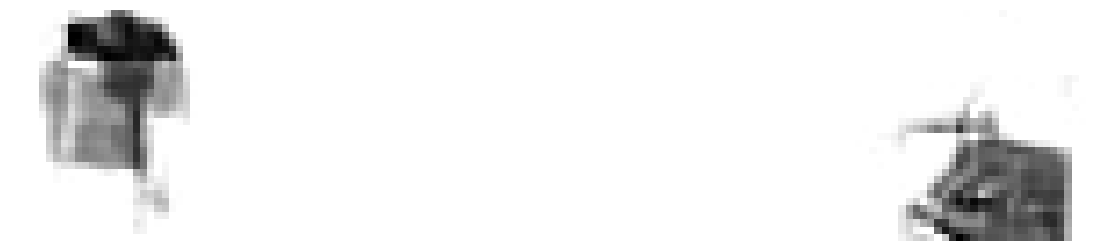

469/469 [==============================] - 318s 678ms/step - loss: 1858.2999
Epoch 7/10
469/469 [==============================] - ETA: 0s - loss: 1836.0728
Saved to ./temp/output/generated_img_006.png


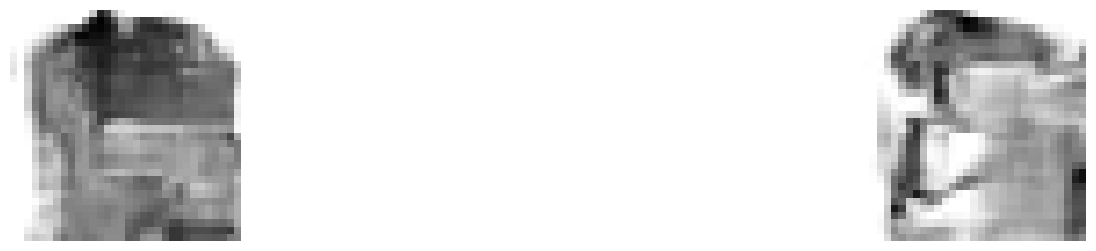

469/469 [==============================] - 315s 672ms/step - loss: 1836.0728
Epoch 8/10
469/469 [==============================] - ETA: 0s - loss: 1818.6348
Saved to ./temp/output/generated_img_007.png


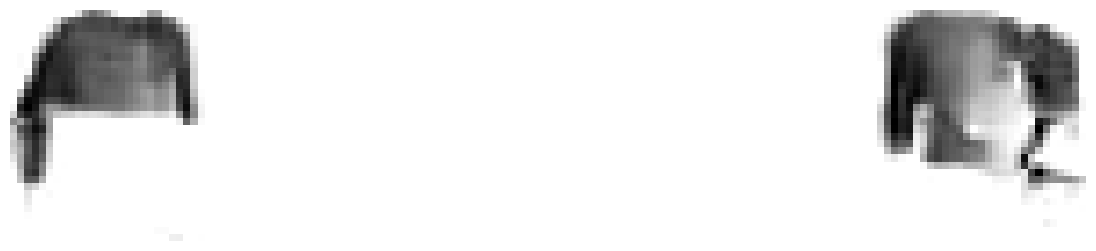

469/469 [==============================] - 320s 682ms/step - loss: 1818.6348
Epoch 9/10
469/469 [==============================] - ETA: 0s - loss: 1799.5593
Saved to ./temp/output/generated_img_008.png


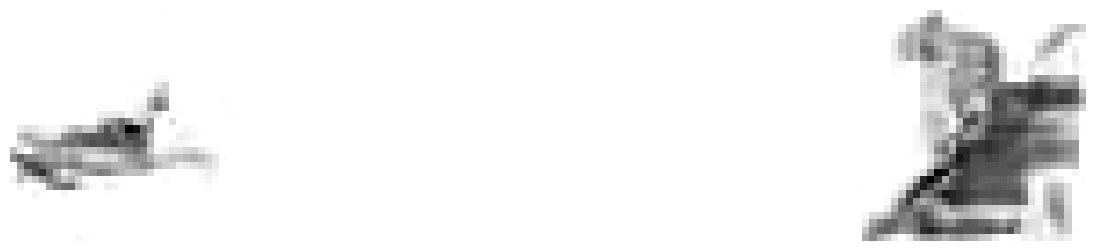

469/469 [==============================] - 316s 673ms/step - loss: 1799.5593
Epoch 10/10
469/469 [==============================] - ETA: 0s - loss: 1778.5878
Saved to ./temp/output/generated_img_009.png


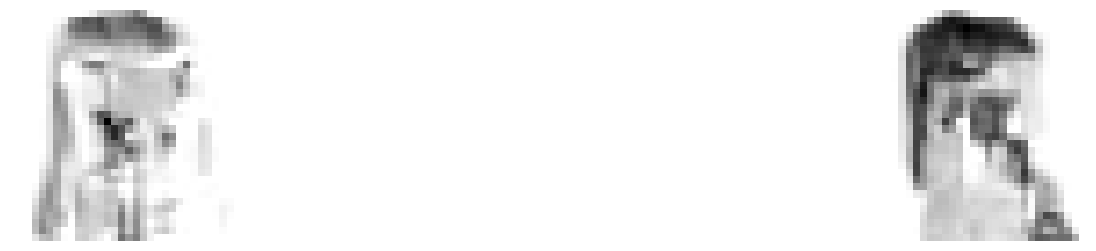

469/469 [==============================] - 316s 674ms/step - loss: 1778.5878


In [7]:
# Compile and train the model
pixelcnn.compile(
    optimizer=optimizers.Adam(0.001),
)

tensorboard_callback = callbacks.TensorBoard(log_dir="./temp/logs")

Path("./temp/output").mkdir(parents=True, exist_ok=True)

class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img

    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(
            generated_images,
            n=self.num_img,
            save_to="./temp/output/generated_img_%03d.png" % (epoch),
        )



img_generator_callback = ImageGenerator(num_img=2)

pixelcnn.fit(
    input_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=True,
    callbacks=[tensorboard_callback, img_generator_callback],
)

## 4.Generate Images

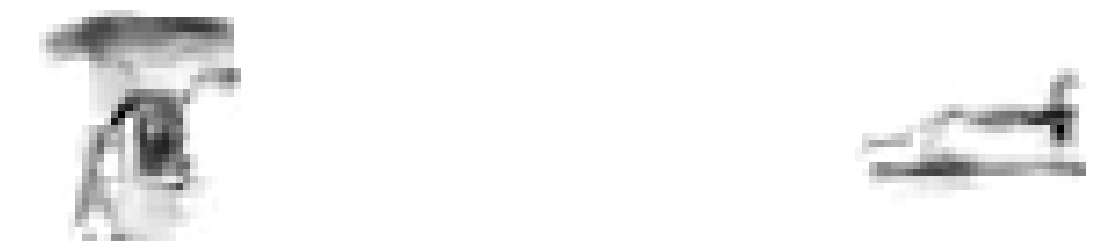

In [8]:
generated_images = img_generator_callback.generate()
display(generated_images, n=img_generator_callback.num_img)